In [223]:
#import depndencies
import pandas as pd
import numpy as np
#import plotly as ply 
from matplotlib import pyplot as plt
from datetime import datetime as dt


In [2]:
#reading data for years 2016, 2017, 2018 from the csv files
crimedata_2016 = pd.read_csv("2016_Annual_Crime.csv")
crimedata_2017 = pd.read_csv("2017_Annual_Crime.csv")
crimedata_2018 = pd.read_csv("2018_Annual_Crime.csv")

In [3]:
#get unique crime categories
crimedata_2018["Category Description"].unique()
crimedata_2016["Category Description"].unique()
#crimedata_2018.head()

array([nan, 'Robbery', 'Burglary', 'Auto Theft', 'Aggravated Assault',
       'Theft', 'Rape', 'Murder'], dtype=object)

In [4]:
#some of the records for 2016 and 2018 occured at earlier years - 2017 records are fine
#but were reported in these years. So this will skew our data
#Resolution: will focus just on records that occured and were reported on that same year

crimedata_2016 = crimedata_2016[crimedata_2016['Occurred Date'] == crimedata_2016['Report Date']]

crimedata_2018 = crimedata_2018[crimedata_2018['Occurred Date'] == crimedata_2018['Report Date']]
len(crimedata_2018['Incident Number'].unique())

74130

In [5]:
#getting the different columns of interest
cleaned_crimedata_2016_df = crimedata_2016[["Category Description", 
                              "Report Date","Zip Codes"]]
cleaned_crimedata_2017_df = crimedata_2017[["Highest NIBRS/UCR Offense Description", 
                              "GO Report Date","GO Location Zip"]]
cleaned_crimedata_2018_df = crimedata_2018[["Category Description", 
                              "Report Date","Zip Codes"]]
cleaned_crimedata_2018_df.head(2)

,Category Description,Report Date,Zip Codes
0,Aggravated Assault,12/31/2018,3641.0
1,NaN,12/31/2018,3247.0


In [6]:
#note the count of records before dropping null entries
cleaned_crimedata_2016_df.count()
cleaned_crimedata_2017_df.count()
cleaned_crimedata_2018_df.count()

Category Description    20132
Report Date             74130
Zip Codes               72633
dtype: int64

In [7]:
#drop rows/columns with null values 
cleaned_crimedata_2016_df = cleaned_crimedata_2016_df.dropna(how='any')
cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.dropna(how='any')
cleaned_crimedata_2018_df = cleaned_crimedata_2018_df.dropna(how='any')

#cleaned_crimedata_2016_df.count()
#cleaned_crimedata_2018_df.head()

In [8]:
#rename some of the columns to be more descriptive
cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.rename(columns={"Highest NIBRS/UCR Offense Description":"Offense",
                                   "GO Report Date": "Report Date",
                                   "GO Location Zip":"Zip Code"})
cleaned_crimedata_2018_df = cleaned_crimedata_2018_df.rename(columns={"Category Description":"Offense"})
cleaned_crimedata_2016_df = cleaned_crimedata_2016_df.rename(columns={"Category Description":"Offense"})
#cleaned_crimedata_2016_df.head()
#cleaned_crimedata_2018_df['Report Date'].dtype

In [9]:
#convert the date field to datetime object/format
cleaned_crimedata_2016_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2016_df["Report Date"])
cleaned_crimedata_2017_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2017_df["Report Date"])
cleaned_crimedata_2018_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2018_df["Report Date"])
cleaned_crimedata_2016_df.head()

#get the month
cleaned_crimedata_2016_df["Month Number"] = cleaned_crimedata_2016_df["Report Date - converted"].dt.month
cleaned_crimedata_2017_df["Month Number"] = cleaned_crimedata_2017_df["Report Date - converted"].dt.month
cleaned_crimedata_2018_df["Month Number"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.month
cleaned_crimedata_2017_df.head()

#get the week number
cleaned_crimedata_2016_df["Week #"] = cleaned_crimedata_2016_df["Report Date - converted"].dt.week
cleaned_crimedata_2017_df["Week #"] = cleaned_crimedata_2017_df["Report Date - converted"].dt.week
cleaned_crimedata_2018_df["Week #"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.week
cleaned_crimedata_2017_df.head()

#get the years
cleaned_crimedata_2016_df["Year"] = cleaned_crimedata_2016_df["Report Date - converted"].dt.year
cleaned_crimedata_2017_df["Year"] = cleaned_crimedata_2017_df["Report Date - converted"].dt.year
cleaned_crimedata_2018_df["Year"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.year
cleaned_crimedata_2016_df.head()
#strftime()
#cleaned_crimedata_2017_df["Year"] = cleaned_crimedata_2017_df["report date - converted"].dt.year
#cleaned_crimedata_2017_df.head()

#cleaned_crimedata_2017_df["Month Name"] = cd.month_name[cleaned_crimedata_2017_df["Month Number"]]
#(calendar.month_name[month_idx])

#cleaned_crimedata_2017_df["Week #"] = cleaned_crimedata_2017_df["report date - converted"].dt.week



,Offense,Report Date,Zip Codes,Report Date - converted,Month Number,Week #,Year
9,Robbery,12/31/2016,3241.0,2016-12-31,12,52,2016
11,Burglary,12/31/2016,3259.0,2016-12-31,12,52,2016
22,Auto Theft,12/31/2016,3641.0,2016-12-31,12,52,2016
24,Aggravated Assault,12/31/2016,3641.0,2016-12-31,12,52,2016
36,Theft,12/31/2016,3239.0,2016-12-31,12,52,2016


In [10]:
#cleaned_crimedata_2018_df.head()

In [11]:
#Note the week # for 2018
cleaned_crimedata_2018_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2018_df["Report Date"])

cleaned_crimedata_2018_df["Month Number"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.month
cleaned_crimedata_2018_df.head()

cleaned_crimedata_2018_df["Week #"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.week
record = cleaned_crimedata_2018_df[cleaned_crimedata_2018_df['Report Date'] == '11/15/2018']
record.head()

,Offense,Report Date,Zip Codes,Report Date - converted,Month Number,Week #,Year
12147,Theft,11/15/2018,2860.0,2018-11-15,11,46,2018
12150,Aggravated Assault,11/15/2018,3637.0,2018-11-15,11,46,2018
12168,Theft,11/15/2018,2857.0,2018-11-15,11,46,2018
12175,Burglary,11/15/2018,3259.0,2018-11-15,11,46,2018
12179,Theft,11/15/2018,3637.0,2018-11-15,11,46,2018


In [12]:
cleaned_crimedata_2018_df.head()

,Offense,Report Date,Zip Codes,Report Date - converted,Month Number,Week #,Year
0,Aggravated Assault,12/31/2018,3641.0,2018-12-31,12,1,2018
9,Burglary,12/31/2018,3256.0,2018-12-31,12,1,2018
16,Robbery,12/31/2018,3243.0,2018-12-31,12,1,2018
26,Robbery,12/31/2018,2857.0,2018-12-31,12,1,2018
28,Burglary,12/31/2018,3646.0,2018-12-31,12,1,2018


In [13]:
#first half of the year data 
fh_crimedata_2016_df = cleaned_crimedata_2016_df[cleaned_crimedata_2016_df['Week #'] < 27]
fh_crimedata_2017_df = cleaned_crimedata_2017_df[cleaned_crimedata_2017_df['Week #'] < 27]
fh_crimedata_2018_df = cleaned_crimedata_2018_df[cleaned_crimedata_2018_df['Week #'] < 27]
fh_crimedata_2016_df.count()
#fh_crimedata_2016_df.head(2)

Offense                    10694
Report Date                10694
Zip Codes                  10694
Report Date - converted    10694
Month Number               10694
Week #                     10694
Year                       10694
dtype: int64

In [14]:
#
len(fh_crimedata_2017_df["Offense"].sum())    #total crimes during the first half of the year
fh_crimedata_2016_df["Offense"].value_counts()
fh_crimedata_2017_df["Offense"].value_counts()
fh_crimedata_2018_df["Offense"].value_counts()

#cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.replace({})

Theft                 6226
Burglary              1304
Aggravated Assault     927
Auto Theft             614
Robbery                451
Murder                  15
Name: Offense, dtype: int64

In [ ]:
#number of weeks
len(fh_crimedata_2016_df['Week #'].unique())
fh_crimedata_2018_df['Week #'].unique()


In [15]:
#combining Auto Theft records to theft record
fh_crimedata_2016_df = fh_crimedata_2016_df.replace({"Auto Theft":"Theft"})
fh_crimedata_2017_df = fh_crimedata_2017_df.replace({"Auto Theft":"Theft"})
fh_crimedata_2018_df = fh_crimedata_2018_df.replace({"Auto Theft":"Theft"})

#fh_crimedata_2018_df["Offense"].value_counts()

In [16]:
#grouping records by Week # and Offense types
group_crimedata_2016 = fh_crimedata_2016_df.groupby(("Week #", "Offense"))#, "Year"))
group_crimedata_2017 = fh_crimedata_2017_df.groupby(("Week #", "Offense"))#, "Year"))
group_crimedata_2018 = fh_crimedata_2018_df.groupby(("Week #", "Offense"))#, "Year"))

#group_crimedata_2018.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  after removing the cwd from sys.path.


In [17]:
#group_crimedata_2017_df is abbreviated gcd_2017_df
gcd_2016_df = group_crimedata_2016.count()
gcd_2017_df = group_crimedata_2017.count()
gcd_2018_df = group_crimedata_2018.count()
gcd_2016_df.head()

Report Date  Zip Codes  Report Date - converted  \
Week # Offense                                                               
1      Aggravated Assault           27         27                       27   
       Burglary                     76         76                       76   
       Robbery                      13         13                       13   
       Theft                       285        285                      285   
2      Aggravated Assault           28         28                       28   

                           Month Number  Year  
Week # Offense                                 
1      Aggravated Assault            27    27  
       Burglary                      76    76  
       Robbery                       13    13  
       Theft                        285   285  
2      Aggravated Assault            28    28

In [18]:
#Get useful data from the grouped data
gcd_2016_df = gcd_2016_df.reset_index().rename(columns={'Month Number':'Count'})
gcd_2017_df = gcd_2017_df.reset_index().rename(columns={'Month Number':'Count'})
gcd_2018_df = gcd_2018_df.reset_index().rename(columns={'Month Number':'Count'})


In [19]:
#get useful column from the grouped data
gcd_2016_df = gcd_2016_df[['Week #','Offense','Count']]
gcd_2017_df = gcd_2017_df[['Week #','Offense','Count']]
gcd_2018_df = gcd_2018_df[['Week #','Offense','Count']]

gcd_2017_df.tail()

,Week #,Offense,Count
135,26,Agg Assault,44
136,26,Burglary,86
137,26,Rape,15
138,26,Robbery,15
139,26,Theft,502


In [22]:
gcd_2016_df["Year"] = 2016
gcd_2017_df["Year"] = 2017
gcd_2018_df["Year"] = 2018

gcd_2018_df.head()

,Week #,Offense,Count,Year
0,1,Aggravated Assault,40,2018
1,1,Burglary,60,2018
2,1,Robbery,26,2018
3,1,Theft,249,2018
4,2,Aggravated Assault,36,2018


In [146]:
crime_records = [gcd_2016_df, gcd_2017_df, gcd_2018_df]
crime_records = pd.concat(crime_records)
crime_records.head(1)

,Week #,Offense,Count,Year
0,1,Aggravated Assault,27,2016


In [53]:
crime_records['Offense'].unique()

array(['Aggravated Assault', 'Burglary', 'Robbery', 'Theft', 'Murder',
       'Agg Assault', 'Rape'], dtype=object)

In [284]:
crime_records = crime_records.replace({'Agg Assault': 'Aggravated Assault'})


In [147]:
crime_records.head(1)

,Week #,Offense,Count,Year
0,1,Aggravated Assault,27,2016


In [72]:
#group by year, week and offense
dif_yr = crime_records['Year'].unique()
dif_crime = crime_records['Offense'].unique()
dif_week = crime_records['Week #'].unique()

In [73]:
dif_week

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [173]:
#crime_records counts by offense type
tr = crime_records[crime_records['Offense']=='Theft']['Year']#['Count']
jr = crime_records[crime_records['Offense']=='Theft']
#              ['Year']==2016]['Count']

#crime_records[crime_records['Offense']=='Theft'].Count

jr[jr['Year']==2016].Count#['Count']

In [155]:
#print just the number of records that matches 
#the offense type for a given year

val = (crime_records['Offense']=='Theft').bool
#val

#if val: 
    #print(val)
#    print(crime_records[crime_records['Offense']=='Theft']['Count'])


In [285]:
crime_records['Offense'].unique()

array(['Aggravated Assault', 'Burglary', 'Robbery', 'Theft', 'Murder',
       'Rape'], dtype=object)

In [262]:
wk = crime_records['Week #'].unique()
wk

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [283]:
#for year in dif_yr:
#    print("In ", year)
#    for week in wk:
#        print("During Week # ", week)
#        for off in dif_crime:
            #print(len(crime_records[crime_records['Offense']==off]), " ", off)
#            print(crime_records[crime_records['Offense']==off]['Count'], " ", off)
#    print("\n")


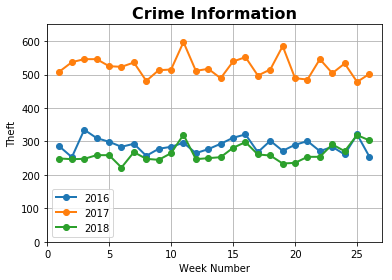

In [321]:
for year in dif_yr:
    #    subplot()
    tf = crime_records[crime_records['Offense']=='Theft']
    ct = tf[tf['Year']==year].Count
    plt.plot(dif_week, ct, linewidth=2, marker="o")
#    burglary = plt.plot(dif_week, linewidth=2, marker="o")
    plt.legend(['2016', '2017', '2018'], loc="best")
    plt.xlabel('Week Number')
    plt.ylabel('Theft')
    plt.title("Crime Information",fontsize=16, fontweight="bold")
    plt.grid()
    plt.xlim(0,27,1)
    plt.ylim(0,650,50)
    plt.savefig('theft_info.png')
 

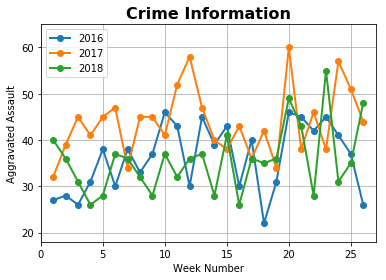

In [325]:
#agg assault
for year in dif_yr:
    #    subplot()
    ag = crime_records[crime_records['Offense']=='Aggravated Assault']
    ca = ag[ag['Year']==year].Count
    plt.plot(dif_week, ca, linewidth=2, marker="o")
    plt.legend(['2016', '2017', '2018'], loc="best")
    plt.xlabel('Week Number')
    plt.ylabel('Aggravated Assault')
    plt.title("Crime Information",fontsize=16, fontweight="bold")
    plt.grid()
    plt.xlim(0,27,1)
    plt.ylim(18, max(ca)+10)
    plt.savefig('agg_info.png')
 

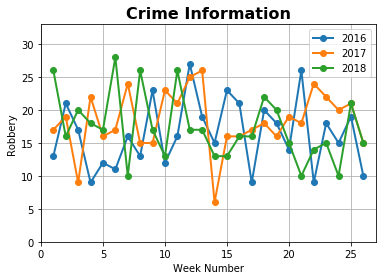

In [329]:
#Robbery info
for year in dif_yr:
    #    subplot()
    rb = crime_records[crime_records['Offense']=='Robbery']
    cr = rb[rb['Year']==year].Count
    plt.plot(dif_week, cr, linewidth=2, marker="o")
    plt.legend(['2016', '2017', '2018'], loc="best")
    plt.xlabel('Week Number')
    plt.ylabel('Robbery')
    plt.title("Crime Information",fontsize=16, fontweight="bold")
    plt.grid()
    plt.xlim(0,27,1)
    plt.ylim(0, max(cr)+5)
    plt.savefig('rob_info.png')
 

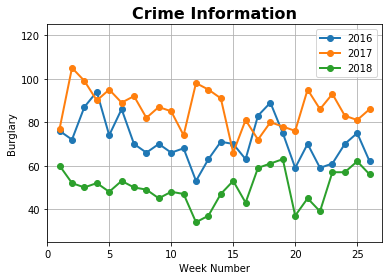

In [356]:
#Burglary info
for year in dif_yr:
    #    subplot()
    bu = crime_records[crime_records['Offense']=='Burglary']
    cb = bu[bu['Year']==year].Count    
    plt.plot(dif_week, cb, linewidth=2, marker="o")
    plt.legend(['2016', '2017', '2018'], loc="best")
    plt.xlabel('Week Number')
    plt.ylabel('Burglary')
    plt.title("Crime Information",fontsize=16, fontweight="bold")
    plt.grid()
    plt.xlim(0,27)
    plt.ylim(25, 125)
    plt.savefig('burg_info.png')
 

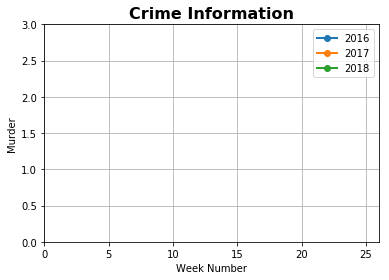

In [355]:
#Murder info -- not used as very limited records found
for year in dif_yr:
    #    subplot()
    mu = crime_records[crime_records['Offense']=='Murder']
    cm = mu[mu['Year']==year].Count
    plt.plot(dif_week, cr, linewidth=2, marker="o")
    plt.legend(['2016', '2017', '2018'], loc="best")
    plt.xlabel('Week Number')
    plt.ylabel('Murder')
    plt.title("Crime Information",fontsize=16, fontweight="bold")
    plt.grid()
    plt.xlim(0, max(dif_week))
    plt.ylim(0, 3)
    plt.savefig('murd_info.png')
 

only info for 2017
only info for 2017
only info for 2017


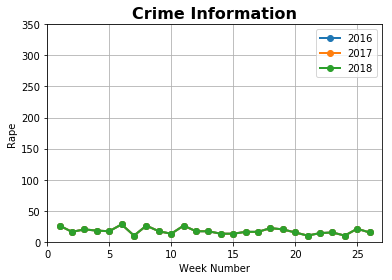

In [359]:
#Rape info --- not used as we only have for one year
for year in dif_yr:
    #    subplot()
    rp = crime_records[crime_records['Offense']=='Rape']
    crp = rp[rp['Year']==year].Count
    plt.plot(dif_week, cr, linewidth=2, marker="o")
    plt.legend(['2016', '2017', '2018'], loc="best")
    plt.xlabel('Week Number')
    plt.ylabel('Rape')
    plt.title("Crime Information",fontsize=16, fontweight="bold")
    plt.grid()
    plt.xlim(0, max(dif_week)+1)
    plt.ylim(0, 350)
    print("only info for 2017")
    plt.savefig('rape_info.png')
 

In [358]:
crime_records[crime_records['Offense']=='Rape']

,Week #,Offense,Count,Year
2,1,Rape,13,2017
7,2,Rape,13,2017
13,3,Rape,15,2017
18,4,Rape,15,2017
24,5,Rape,10,2017
29,6,Rape,5,2017
34,7,Rape,19,2017
39,8,Rape,12,2017
44,9,Rape,15,2017
50,10,Rape,17,2017


In [357]:
rp

,Week #,Offense,Count,Year
2,1,Rape,13,2017
7,2,Rape,13,2017
13,3,Rape,15,2017
18,4,Rape,15,2017
24,5,Rape,10,2017
29,6,Rape,5,2017
34,7,Rape,19,2017
39,8,Rape,12,2017
44,9,Rape,15,2017
50,10,Rape,17,2017


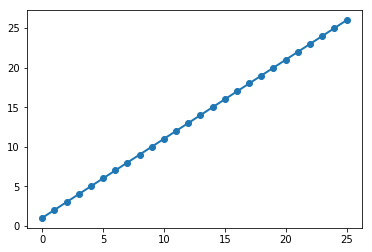

In [288]:
burglary = plt.plot(dif_week, linewidth=2, marker="o")

In [66]:
#Useful Report information for the different years
#theft records

#2016 thefts
theft_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Theft']
max_theft_2016 = theft_info_2016['Count'].max()
min_theft_2016 = theft_info_2016['Count'].min()
max_theft_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_theft_2016]
min_theft_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_theft_2016]

#2017 thefts
theft_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft']
max_theft_2017 = theft_info_2017['Count'].max()
min_theft_2017 = theft_info_2017['Count'].min()
max_theft_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_theft_2017]
min_theft_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_theft_2017]

#2018 thefts
theft_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Theft']
max_theft_2018 = theft_info_2018['Count'].max()
min_theft_2018 = theft_info_2018['Count'].min()
max_theft_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_theft_2018]
min_theft_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_theft_2018]


max_theft_week_2017

,Week #,Offense,Count,Year
58,11,Theft,597,2017


In [67]:
#max_theft_2017
max_theft_week_2017 
#min_theft_week_2017

#max_theft = gcd_2017_df.loc[gcd_2017_df['Count']==(gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft'].max())] 
#week_dat['Count']
#week_dat
#week_dat1
#gcd_2017_df.head()


#gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft'].max(gcd_2017_df['Count'])

,Week #,Offense,Count,Year
58,11,Theft,597,2017


In [68]:
weeks = gcd_2016_df['Week #'].unique()

thefts = gcd_2016_df[gcd_2016_df['Offense']=='Aggravated Assault']['Count']
#thefts

In [69]:
gcd_2016_df[gcd_2016_df['Offense']=='Theft']['Count']

3      285
7      253
12     335
16     310
20     299
24     284
28     293
32     257
37     278
41     284
45     296
49     265
53     277
58     293
62     311
66     321
70     268
75     302
80     272
85     290
89     301
94     271
98     284
103    261
108    321
113    254
Name: Count, dtype: int64

In [224]:
#crime info for 2016
for crime in gcd_2016_df['Offense'].unique():
    print(crime)
    weekly_crime = gcd_2016_df[gcd_2016_df['Offense']==crime]['Count']
    plt.plot(weeks, weekly_crime, linewidth=2, marker="o")
    plt.yscale('log')
    plt.ylabel('Total')
    plt.xlabel('Week Number')
    plt.legend(loc= "best")

Aggravated Assault
Burglary
Robbery
Theft
Murder


In [35]:
#crime info for 2017
for crime in gcd_2017_df['Offense'].unique():
    print(crime)
    weekly_crime = gcd_2017_df[gcd_2017_df['Offense']==crime]['Count']
#    plt.plot(weeks, weekly_crime, linewidth=2, marker="o")
#    plt.yscale('log')
#    plt.ylabel('Total')
#    plt.xlabel('Week Number')
#    plt.legend(loc= "best")

Agg Assault
Burglary
Rape
Robbery
Theft
Murder


In [37]:
#crime info for 2018
for crime in gcd_2018_df['Offense'].unique():
    print(crime)
    weekly_crime = gcd_2018_df[gcd_2018_df['Offense']==crime]['Count']
#    plt.plot(weeks, weekly_crime, linewidth=2, marker="o")
#    plt.yscale('log')
#    plt.ylabel('Total')
#    plt.xlabel('Week Number')
#    plt.legend(loc= "best")

Aggravated Assault
Burglary
Robbery
Theft
Murder


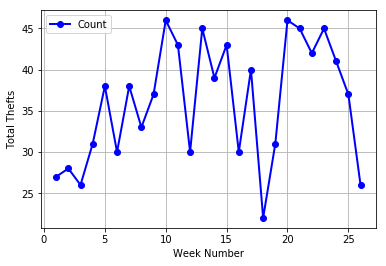

In [201]:
plt.plot(weeks, thefts, linewidth=2, marker="o", color="blue")
plt.grid()
plt.xlabel("Week Number")
plt.ylabel("Total Thefts")
#plt.xlim(1,27,1)
plt.legend()

In [227]:
gcd_2016_df.head()

,Week #,Offense,Count
0,1,Aggravated Assault,27
1,1,Burglary,76
2,1,Robbery,13
3,1,Theft,285
4,2,Aggravated Assault,28


In [ ]:
#Aggravated Assault records
#2016 aggravated assaults
agg_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Aggravated Assault']
max_agg_num_2016 = agg_info_2016['Count'].max()
min_agg_num_2016 = agg_info_2016['Count'].min()
max_agg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_agg_num_2016]
min_agg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_agg_num_2016]

#2017 aggravated assaults
agg_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Agg Assault']
max_agg_num_2017 = agg_info_2017['Count'].max()
min_agg_num_2017 = agg_info_2017['Count'].min()
max_agg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_agg_num_2017]
min_agg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_agg_num_2017]

#2018 aggravated assaults
agg_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Aggravated Assault']
max_agg_num_2018 = agg_info_2018['Count'].max()
min_agg_num_2018 = agg_info_2018['Count'].min()
max_agg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_agg_num_2018]
min_agg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_agg_num_2018]

#min_agg_week_2018
#agg_info_2018

In [ ]:
#max agg_assault record
max_agg_num_2017
max_agg_week_2017
#min agg_assault record
min_agg_num_2017
min_agg_week_2017

cleaned_crimedata_2016_df['Offense'].unique()

In [ ]:
#Burglary records
#2016 Burglary
burg_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Burglary']
max_burg_num_2016 = burg_info_2016['Count'].max()
min_burg_num_2016 = burg_info_2016['Count'].min()
max_burg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_burg_num_2016]
min_burg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_burg_num_2016]

#2017 aggravated assaults
burg_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Burglary']
max_burg_num_2017 = burg_info_2017['Count'].max()
min_burg_num_2017 = burg_info_2017['Count'].min()
max_burg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_burg_num_2017]
min_burg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_burg_num_2017]

#2018 aggravated assaults
burg_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Burglary']
max_burg_num_2018 = burg_info_2018['Count'].max()
min_burg_num_2018 = burg_info_2018['Count'].min()
max_burg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_burg_num_2018]
min_burg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_burg_num_2018]

min_burg_week_2018

In [ ]:
cleaned_crimedata_2016_df['Offense'].unique()

In [ ]:
#Robbery records
#2016 Robbery
rob_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Robbery']
max_rob_num_2016 = rob_info_2016['Count'].max()
min_rob_num_2016 = rob_info_2016['Count'].min()
max_rob_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_rob_num_2016]
min_rob_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_rob_num_2016]

#2017 Robbery
rob_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Robbery']
max_rob_num_2017 = rob_info_2017['Count'].max()
min_rob_num_2017 = rob_info_2017['Count'].min()
max_rob_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_rob_num_2017]
min_rob_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_rob_num_2017]

#2018 Robbery
rob_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Robbery']
max_rob_num_2018 = rob_info_2018['Count'].max()
min_rob_num_2018 = rob_info_2018['Count'].min()
max_rob_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_rob_num_2018]
min_rob_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_rob_num_2018]

max_rob_week_2016

In [ ]:
#Murder records
#2016 Murder
murd_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Murder']
max_murd_num_2016 = murd_info_2016['Count'].max()
min_murd_num_2016 = murd_info_2016['Count'].min()
max_murd_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_murd_num_2016]
min_murd_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_murd_num_2016]

#2017 Murder
murd_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Murder']
max_murd_num_2017 = murd_info_2017['Count'].max()
min_murd_num_2017 = murd_info_2017['Count'].min()
max_murd_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_murd_num_2017]
min_murd_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_murd_num_2017]

#2018 Murder
murd_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Murder']
max_murd_num_2018 = murd_info_2018['Count'].max()
min_murd_num_2018 = murd_info_2018['Count'].min()
max_murd_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_murd_num_2018]
min_murd_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_murd_num_2018]

#max_murd_week_2018

In [101]:
#gcd_2016_df['Offense']=='Aggravated Assault'

(0.25, 26.75)

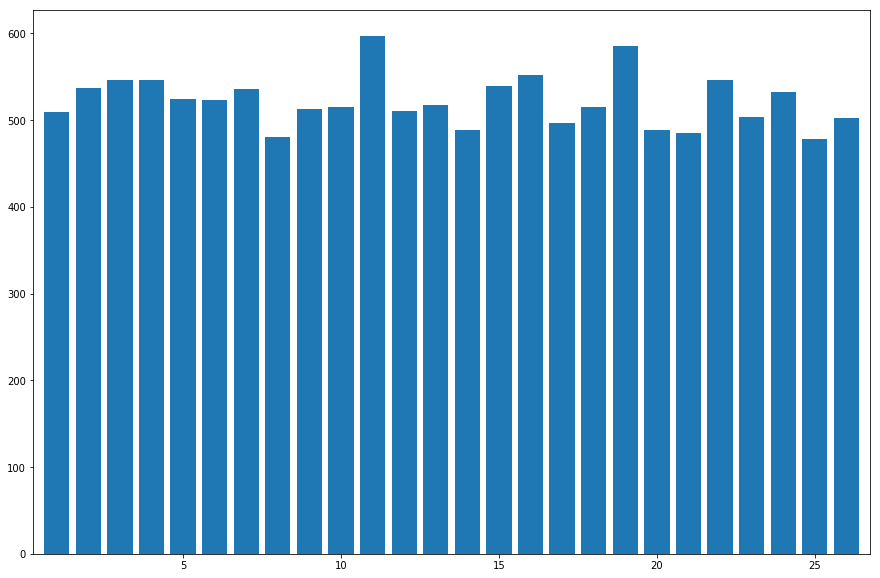

In [102]:
#plot for 2017
plt.figure(figsize=(15,10))
plt.bar(gcd_2017_df['Week #'], gcd_2017_df['Count'], label=gcd_2017_df['Offense']=='Agg Assault')
plt.xlim(0.25, len(fh_crimedata_2017_df['Week #'].unique())+0.75)

In [ ]:
#plot for 2016
plt.figure(figsize=(15,10))
plt.bar(gcd_2016_df['Week #'], gcd_2016_df['Count'], label=gcd_2016_df['Offense'])
plt.xlim(0.25, len(fh_crimedata_2016_df['Week #'].unique())+0.75)

In [98]:
#gcd_2016_df['Week #']

In [ ]:
#plot for 2018
plt.figure(figsize=(15,10))
plt.bar(gcd_2018_df['Week #'], gcd_2018_df['Count'], label=gcd_2018_df['Offense'])
plt.xlim(0.25, len(fh_crimedata_2018_df['Week #'].unique())+0.75)

In [174]:
#agg_info_2018.head()

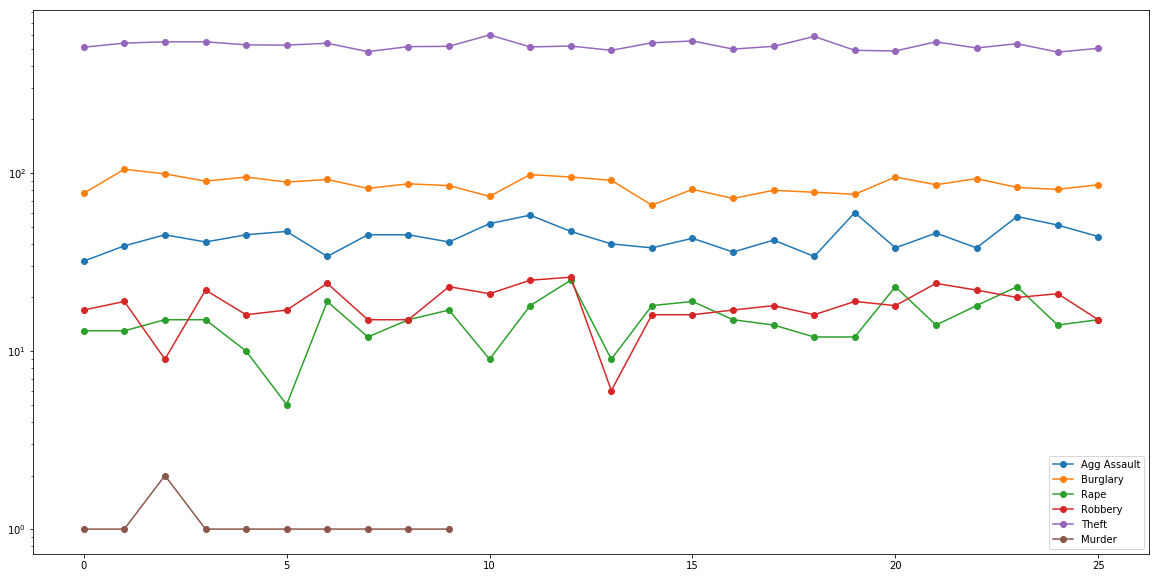

In [133]:
#gcd_2017_df

plt.figure(figsize=[20, 10])
#x_axis = np.arange(364)
for offense in gcd_2017_df['Offense'].unique():
    plt.plot(np.arange(len(gcd_2017_df[gcd_2017_df['Offense'] == offense]['Count'])), 
             gcd_2017_df[gcd_2017_df['Offense'] == offense]['Count'], marker='o', label=offense)
    #x_axis = x_axis + 0.1
#plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0, len(gcd_2017_df['Week #'].unique())+1.75)
plt.yscale('log')
plt.legend()

In [ ]:

#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#plt.plot(months, gcd_2017_df.iloc[4:9]#,"District"])

#plt.show()

#group_crime_2017["Offense"].count().plot.line()

In [ ]:
#gcd_2017_df[gcd_2017_df['Offense'] == 'Robbery']['Count']